## Import Modules

In [267]:
import numpy as np
import matplotlib.pyplot as plt

## RNN

### Define Class

In [332]:
class RNN:
    def __init__(self, input_size, hidden_size, output_size, time_steps):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.time_steps = time_steps

        self.h0 = np.zeros((1, self.hidden_size))

        self.Wx = np.random.random((self.input_size, hidden_size))
        self.Wh = np.random.random((self.hidden_size, self.hidden_size))
        self.Wy = np.random.random((self.hidden_size, output_size))
        self.b = np.random.random(self.hidden_size)

        self.nb_output = 1
    
    def tanh(self, x):
        return np.tanh(x)

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def MSE(self, y, y_hat):
        return np.mean((y_hat-y)**2)

    def numerical_diff(self, f, x):
        h = 1e-4
        return (f(x+h) - f(x-h)) / (2*h)
    
    def forward(self, h_before, input_x):
        hidden_state = self.tanh(h_before.dot(self.Wh)+input_x.dot(self.Wx)+self.b)
        y_hat = self.sigmoid(hidden_state.dot(self.Wy))
        return hidden_state, y_hat

    def predict(self, input_x):
        input_x = input_x.reshape(self.time_steps, 1)
        results = np.empty((1, 0))

        h_before = self.h0
        for time_step in range(self.time_steps):
            h_before, y_hat = self.forward(h_before, input_x[time_step])
            results = np.append(results, y_hat)
        
        return results[-1]
    
    def train(self, x_train, y_train):
        hist = []
        for x in x_train:
            hist.append(self.predict(x))
        hist = np.array(hist)
        loss = self.MSE(hist, y_train)
        return hist, loss

## Data Preprocessing

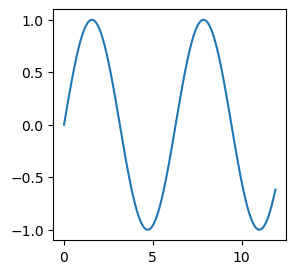

In [289]:
x = np.arange(0, 12, 0.1)
y = np.sin(x)

plt.figure(figsize=(3, 3))
plt.plot(x, y)
plt.show()

In [307]:
x_train, y_train = [], []
for i in range(len(y)):
    if i+4 > len(y): break

    cur_x = y[i:i+3]
    cur_y = y[i+3]

    x_train.append(cur_x)
    y_train.append(cur_y)

x_train = np.array(x_train)
y_train = np.array(y_train)

## Test

In [338]:
input_size = 1
hidden_size = 4
output_size = 1
time_steps = 3

rnn = RNN(input_size, hidden_size, output_size, time_steps)

In [339]:
hist, loss = rnn.train(x_train, y_train)

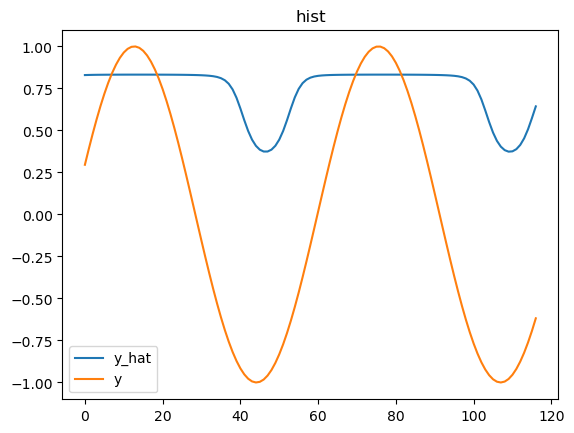

0.90537878813511

In [341]:
plt.figure()
plt.title('hist')
plt.plot(hist, label='y_hat')
plt.plot(y_train, label='y')
plt.legend()
plt.show()

loss

## 미분


In [ ]:
def tanh(self, x):
    return np.tanh(x)

def sigmoid(self, x):
    return 1/(1+np.exp(-x))

def MSE(self, y, y_hat):
    return np.mean((y_hat-y)**2)

def numerical_diff(self, f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
y = 10
